In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
from scipy.stats import chi2_contingency

In [ ]:
df = pd.read_csv("/content/compiled_risk_data.xlsx - Data Analytics.csv")
df.head()

,project_name,Smart contract address,Blog post link,Audit website,Chain,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,...,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths,Summary/rationale of risk tags marked true
0,Data Analytics,384571416209d08623c6ace9422613fc8970475d,https://chainsecurity.com/security-audit/circl...,https://chainsecurity.com,Ethereum,False,False,False,False,False,...,False,False,True,True,True,True,False,False,False,Bad Contract: Assigned for flaws that indicate...
1,Data Analytics,0xAb5801a7D398351b8bE11C439e05C5B3259ae9B,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,False,False,True,True,False,...,False,True,False,True,False,False,True,False,True,Summary/rationale of risk tags marked true: Th...
2,Data Analytics,0x4B20993Bc481177ec7E8f571ceCaE8A9e22C02db,https://stackoverflow.com/questions/71115106/s...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,False,True,False,...,False,True,False,True,False,False,False,True,True,NaN
3,Data Analytics,0x78731D3Ca6b7E34aC0F824c42a7cC18A495cabaB,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,True,False,False,False,True,...,False,True,False,False,True,True,False,False,True,NaN
4,Data Analytics,0x617F2E2fD72FD9D5503197092aC168c91465E7f2,https://stackoverflow.com/questions/69466137/h...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,True,False,True,...,False,False,True,True,False,True,False,False,True,The smart contract is marked with risks such a...


In [ ]:
df.isna().sum()

,0
project_name,0
Smart contract address,0
Blog post link,0
Audit website,0
Chain,0
Is_closed_source,0
hidden_owner,0
anti_whale_modifiable,0
Is_anti_whale,0
Is_honeypot,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   project_name                                967 non-null    object
 1   Smart contract address                      967 non-null    object
 2   Blog post link                              967 non-null    object
 3   Audit website                               967 non-null    object
 4   Chain                                       967 non-null    object
 5   Is_closed_source                            967 non-null    bool  
 6   hidden_owner                                967 non-null    bool  
 7   anti_whale_modifiable                       967 non-null    bool  
 8   Is_anti_whale                               967 non-null    bool  
 9   Is_honeypot                                 967 non-null    bool  
 10  buy_tax                   

In [ ]:
df.describe()

,project_name,Smart contract address,Blog post link,Audit website,Chain,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,...,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths,Summary/rationale of risk tags marked true
count,967,967,967,967,967,967,967,967,967,967,...,965,966,967,967,967,967,967,967,967,628
unique,1,967,665,391,4,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,562
top,Data Analytics,384571416209d08623c6ace9422613fc8970475d,https://hacken.io/research/,https://hacken.io/,Ethereum,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,#NAME?
freq,967,1,23,76,849,821,817,855,829,878,...,778,796,827,676,822,777,871,888,828,8


In [ ]:
def phi_coefficient(x, y):
    """Calculate the Phi coefficient for two binary variables."""

    contingency_table = pd.crosstab(x, y)

    chi2 = scipy.stats.chi2_contingency(contingency_table, correction=False)[0]
    n = np.sum(np.sum(contingency_table))
    phi = np.sqrt(chi2 / n)
    return phi

In [ ]:
risk_df = df.iloc[:, 5:-1]


phi_matrix = pd.DataFrame(index=risk_df.columns, columns=risk_df.columns)

for var1 in risk_df.columns:
    for var2 in risk_df.columns:
        phi_matrix.loc[var1, var2] = phi_coefficient(risk_df[var1], risk_df[var2])

print("Phi coefficients calculated for all pairs of variables:")
phi_matrix

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

Phi coefficients calculated for all pairs of variables:


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/

,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,buy_tax,sell_tax,slippage_modifiable,Is_blacklisted,can_take_back_ownership,...,centralized_risk_medium,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths
Is_closed_source,1.0,0.369825,0.343793,0.315152,0.395294,0.321812,0.387156,0.395293,0.338371,0.271559,...,0.155005,0.217354,0.222421,0.360043,0.132648,0.275936,0.249433,0.342951,0.369848,0.30473
hidden_owner,0.369825,1.0,0.371578,0.356021,0.328014,0.454177,0.422091,0.418828,0.299462,0.372939,...,0.204905,0.332364,0.207183,0.302669,0.129919,0.228094,0.262604,0.335381,0.299793,0.190843
anti_whale_modifiable,0.343793,0.371578,1.0,0.536006,0.443704,0.460264,0.523498,0.625441,0.33861,0.339978,...,0.231735,0.346207,0.180772,0.374556,0.185268,0.300558,0.309001,0.36614,0.411167,0.303052
Is_anti_whale,0.315152,0.356021,0.536006,1.0,0.371245,0.501367,0.513153,0.507013,0.342278,0.281739,...,0.219838,0.294004,0.199763,0.336262,0.170635,0.383476,0.274457,0.34901,0.385632,0.296332
Is_honeypot,0.395294,0.328014,0.443704,0.371245,1.0,0.386469,0.414324,0.389585,0.478634,0.287442,...,0.19187,0.224287,0.275755,0.367158,0.212279,0.387316,0.31973,0.45656,0.440523,0.358995
buy_tax,0.321812,0.454177,0.460264,0.501367,0.386469,1.0,0.710463,0.444537,0.339422,0.326003,...,0.239542,0.291784,0.220048,0.288925,0.157569,0.359325,0.255471,0.354019,0.38716,0.290881
sell_tax,0.387156,0.422091,0.523498,0.513153,0.414324,0.710463,1.0,0.465644,0.381907,0.272188,...,0.291278,0.310494,0.23208,0.328965,0.179746,0.354068,0.337649,0.328301,0.42844,0.295159
slippage_modifiable,0.395293,0.418828,0.625441,0.507013,0.389585,0.444537,0.465644,1.0,0.285621,0.362606,...,0.237516,0.329007,0.244272,0.384301,0.206749,0.315036,0.346361,0.346984,0.415881,0.327842
Is_blacklisted,0.338371,0.299462,0.33861,0.342278,0.478634,0.339422,0.381907,0.285621,1.0,0.244082,...,0.157359,0.333584,0.177963,0.36036,0.185408,0.29712,0.26178,0.378526,0.432002,0.296575
can_take_back_ownership,0.271559,0.372939,0.339978,0.281739,0.287442,0.326003,0.272188,0.362606,0.244082,1.0,...,0.243507,0.36217,0.216989,0.292306,0.136021,0.303422,0.223104,0.354918,0.311808,0.241693


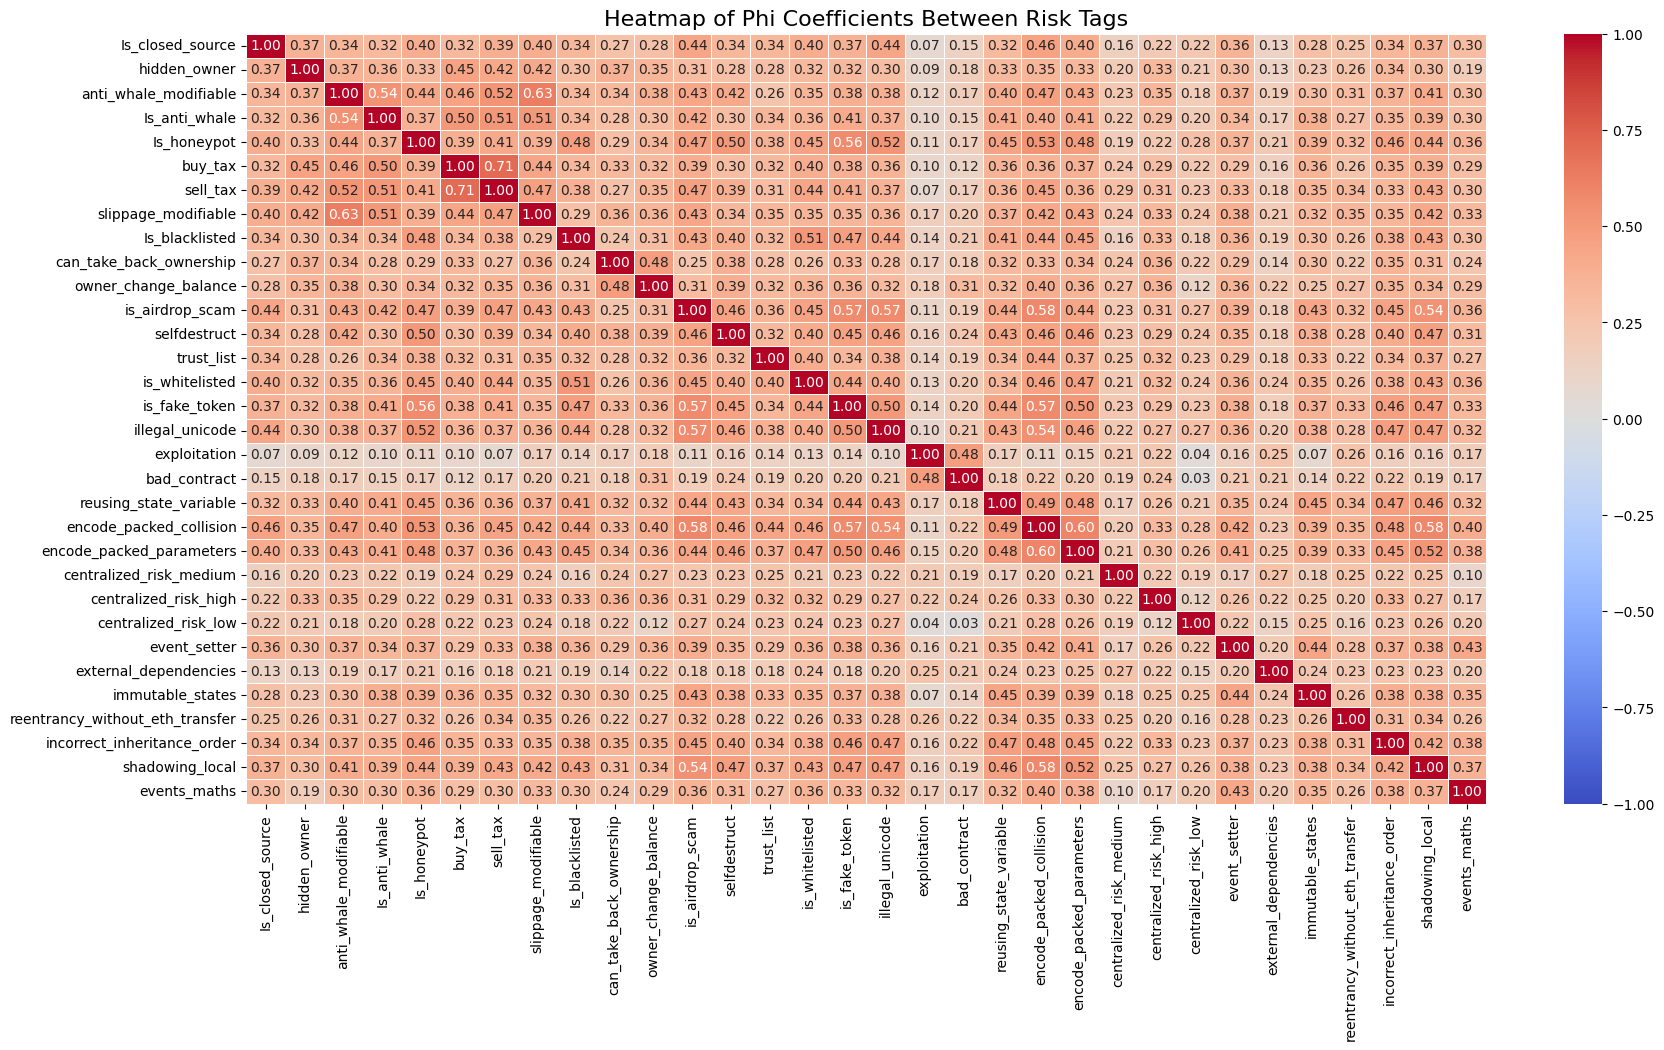

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(phi_matrix.astype(float), annot=True, fmt=".2f", cmap='coolwarm',
            vmin=-1, vmax=1, center=0, linewidths=0.5)
plt.title('Heatmap of Phi Coefficients Between Risk Tags', fontsize=16)
plt.show()

In [ ]:
frequencies_true = risk_df.apply(lambda x: x.value_counts()).loc[True]
frequencies_true = frequencies_true.fillna(0)
frequencies_true.sort_values(ascending = False)


,True
exploitation,437
bad_contract,348
external_dependencies,291
centralized_risk_medium,254
owner_change_balance,204
reentrancy_without_eth_transfer,190
centralized_risk_high,187
can_take_back_ownership,181
centralized_risk_low,170
hidden_owner,150


<ipython-input-10-b8f2dea79185>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies_true.index, y=frequencies_true.values, palette='viridis')


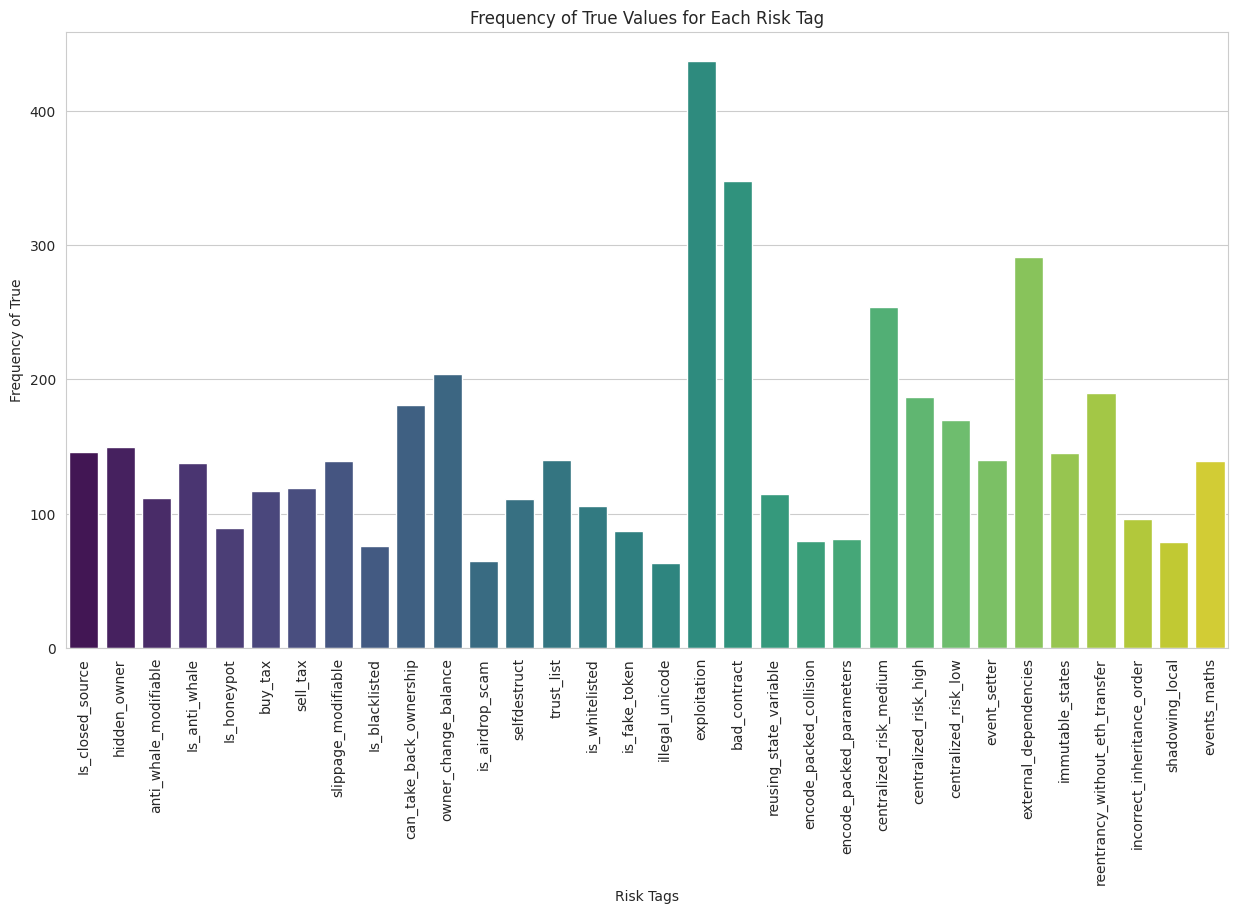

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 8))
sns.barplot(x=frequencies_true.index, y=frequencies_true.values, palette='viridis')
plt.title('Frequency of True Values for Each Risk Tag')
plt.xlabel('Risk Tags')
plt.ylabel('Frequency of True')
plt.xticks(rotation=90)
plt.show()

In [ ]:
frequencies = risk_df.apply(lambda x: x.value_counts()).loc[False]
frequencies = frequencies.fillna(0)
frequencies.sort_values(ascending = False)

,False
illegal_unicode,904
is_airdrop_scam,902
Is_blacklisted,891
shadowing_local,888
encode_packed_collision,886
encode_packed_parameters,885
is_fake_token,880
Is_honeypot,878
incorrect_inheritance_order,871
is_whitelisted,861


<ipython-input-12-9ea67cbe88b1>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies.index, y=frequencies.values, palette='viridis')


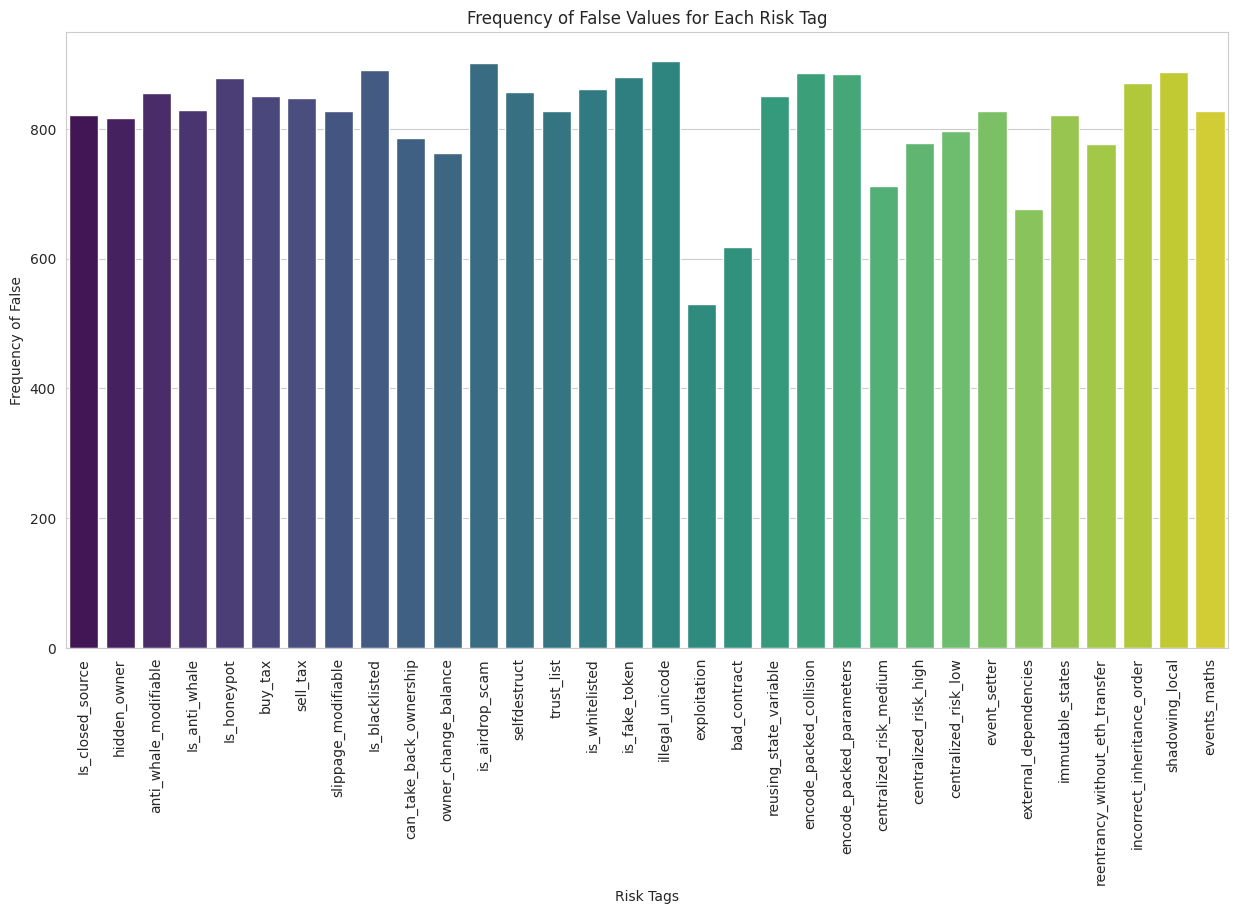

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(15, 8))
sns.barplot(x=frequencies.index, y=frequencies.values, palette='viridis')
plt.title('Frequency of False Values for Each Risk Tag')
plt.xlabel('Risk Tags')
plt.ylabel('Frequency of False')
plt.xticks(rotation=90)
plt.show()

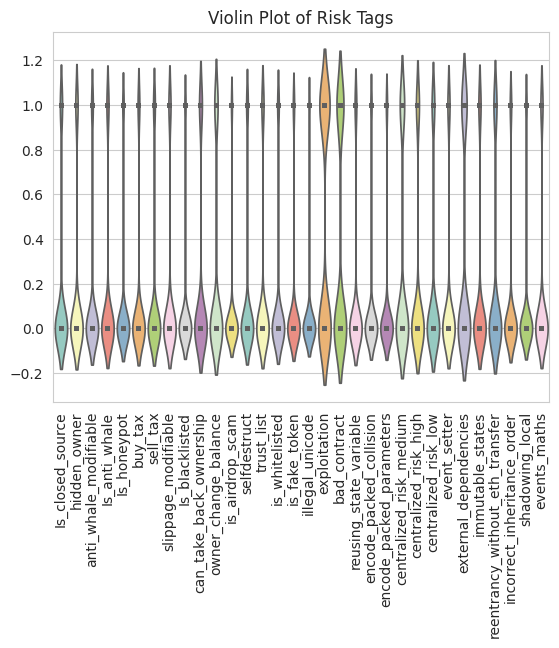

In [ ]:
sns.violinplot(data=risk_df, inner="point", palette="Set3")
plt.title('Violin Plot of Risk Tags')
plt.xticks(rotation=90)
plt.show()

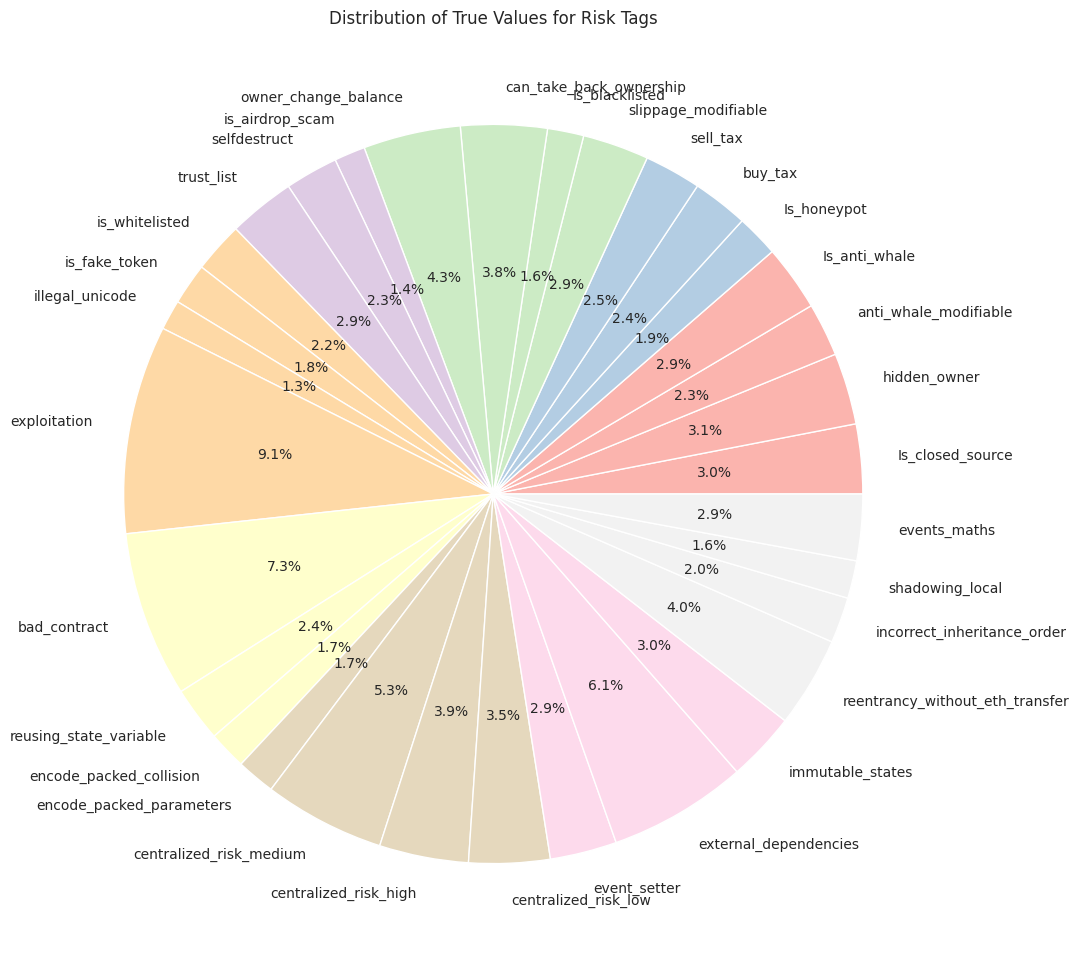

In [ ]:
frequencies_true.plot(kind='pie', autopct='%1.1f%%', figsize=(15, 12), cmap='Pastel1')
plt.title('Distribution of True Values for Risk Tags')
plt.ylabel('')
plt.show()

In [ ]:
duplicates = df.duplicated().sum()
duplicates

0

In [ ]:
missing_values = df.isnull().sum()
missing_values

,0
project_name,0
Smart contract address,0
Blog post link,0
Audit website,0
Chain,0
Is_closed_source,0
hidden_owner,0
anti_whale_modifiable,0
Is_anti_whale,0
Is_honeypot,0


In [ ]:
df = df.dropna()
missing_values = df.isnull().sum()
missing_values

,0
project_name,0
Smart contract address,0
Blog post link,0
Audit website,0
Chain,0
Is_closed_source,0
hidden_owner,0
anti_whale_modifiable,0
Is_anti_whale,0
Is_honeypot,0


In [ ]:
df.head()

,project_name,Smart contract address,Blog post link,Audit website,Chain,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,...,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths,Summary/rationale of risk tags marked true
0,Data Analytics,384571416209d08623c6ace9422613fc8970475d,https://chainsecurity.com/security-audit/circl...,https://chainsecurity.com,Ethereum,False,False,False,False,False,...,False,False,True,True,True,True,False,False,False,Bad Contract: Assigned for flaws that indicate...
1,Data Analytics,0xAb5801a7D398351b8bE11C439e05C5B3259ae9B,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,False,False,True,True,False,...,False,True,False,True,False,False,True,False,True,Summary/rationale of risk tags marked true: Th...
4,Data Analytics,0x617F2E2fD72FD9D5503197092aC168c91465E7f2,https://stackoverflow.com/questions/69466137/h...,https://ethereum.stackexchange.com/questions/1...,Ethereum,True,False,True,False,True,...,False,False,True,True,False,True,False,False,True,The smart contract is marked with risks such a...
5,Data Analytics,0x3f5CE5FBFe3E9af3971dD833D26bA9b5C936f0bE,https://bloxy.info/address/0x3f5ce5fbfe3e9af39...,https://ethplorer.io/address/0x3f5ce5fbfe3e9af...,Ethereum,True,False,False,True,False,...,False,True,False,True,False,True,False,False,False,The smart contract is marked with risks such a...
6,Data Analytics,0x1aE0EA34a72D944a8C7603FfB3eC30a6669E454C,https://forum.openzeppelin.com/t/make-eth-tran...,https://gist.github.com/qope/0c82d0a2c2e0ac5ab...,Ethereum,True,False,False,True,False,...,False,True,False,True,True,False,False,True,False,The smart contract is marked with risks such a...


In [ ]:
risk_tag_columns = df.columns[5:-1]
df[risk_tag_columns] = df[risk_tag_columns].replace({True: 1, False: 0})
df

<ipython-input-19-10dd1040416e>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[risk_tag_columns] = df[risk_tag_columns].replace({True: 1, False: 0})
<ipython-input-19-10dd1040416e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[risk_tag_columns] = df[risk_tag_columns].replace({True: 1, False: 0})


,project_name,Smart contract address,Blog post link,Audit website,Chain,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,...,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths,Summary/rationale of risk tags marked true
0,Data Analytics,384571416209d08623c6ace9422613fc8970475d,https://chainsecurity.com/security-audit/circl...,https://chainsecurity.com,Ethereum,0,0,0,0,0,...,0,0,1,1,1,1,0,0,0,Bad Contract: Assigned for flaws that indicate...
1,Data Analytics,0xAb5801a7D398351b8bE11C439e05C5B3259ae9B,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,0,0,1,1,0,...,0,1,0,1,0,0,1,0,1,Summary/rationale of risk tags marked true: Th...
4,Data Analytics,0x617F2E2fD72FD9D5503197092aC168c91465E7f2,https://stackoverflow.com/questions/69466137/h...,https://ethereum.stackexchange.com/questions/1...,Ethereum,1,0,1,0,1,...,0,0,1,1,0,1,0,0,1,The smart contract is marked with risks such a...
5,Data Analytics,0x3f5CE5FBFe3E9af3971dD833D26bA9b5C936f0bE,https://bloxy.info/address/0x3f5ce5fbfe3e9af39...,https://ethplorer.io/address/0x3f5ce5fbfe3e9af...,Ethereum,1,0,0,1,0,...,0,1,0,1,0,1,0,0,0,The smart contract is marked with risks such a...
6,Data Analytics,0x1aE0EA34a72D944a8C7603FfB3eC30a6669E454C,https://forum.openzeppelin.com/t/make-eth-tran...,https://gist.github.com/qope/0c82d0a2c2e0ac5ab...,Ethereum,1,0,0,1,0,...,0,1,0,1,1,0,0,1,0,The smart contract is marked with risks such a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,Data Analytics,0xa42a2bc10509a470a201b4ef83d4f8c99ec31ae6,https://hacken.io/audits/,https://hacken.io/audits/rwa.inc,Ethereum,1,1,1,1,1,...,1,1,1,1,1,0,0,0,0,This smart contract uses incorrect function lo...
963,Data Analytics,4a4d0b5cd402ceb12fcca03d15a4c948e6bf0830,https://consensys.io/diligence/audits/,https://consensys.io/diligence/audits/2023/05/...,Ethereum,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,These risks highlight the importance of thorou...
964,Data Analytics,b3533f22f2a67a2c4c3e42bbf70f1c5c0af42336,https://consensys.io/diligence/audits/,https://consensys.io/diligence/audits/2023/06/...,Ethereum,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,"The contract has some identified risks, includ..."
965,Data Analytics,39bddb55bd581ca10fa995edc5bbc7d40acbdb3a,https://consensys.io/diligence/audits/,https://consensys.io/diligence/audits/2023/04/...,Ethereum,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,The audit confirms that the contract has immut...


In [ ]:
columns_to_drop = df.columns[[0, 1, -1]]
df = df.drop(columns=columns_to_drop)
df

,Blog post link,Audit website,Chain,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,buy_tax,sell_tax,...,centralized_risk_medium,centralized_risk_high,centralized_risk_low,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths
0,https://chainsecurity.com/security-audit/circl...,https://chainsecurity.com,Ethereum,0,0,0,0,0,0,0,...,1,0,0,1,1,1,1,0,0,0
1,https://stackoverflow.com/questions/75030483/w...,https://studygroup.moralis.io/t/compilation-er...,Ethereum,0,0,1,1,0,1,0,...,0,0,1,0,1,0,0,1,0,1
4,https://stackoverflow.com/questions/69466137/h...,https://ethereum.stackexchange.com/questions/1...,Ethereum,1,0,1,0,1,0,0,...,0,0,0,1,1,0,1,0,0,1
5,https://bloxy.info/address/0x3f5ce5fbfe3e9af39...,https://ethplorer.io/address/0x3f5ce5fbfe3e9af...,Ethereum,1,0,0,1,0,0,1,...,1,0,1,0,1,0,1,0,0,0
6,https://forum.openzeppelin.com/t/make-eth-tran...,https://gist.github.com/qope/0c82d0a2c2e0ac5ab...,Ethereum,1,0,0,1,0,1,0,...,1,0,1,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,https://hacken.io/audits/,https://hacken.io/audits/rwa.inc,Ethereum,1,1,1,1,1,1,1,...,0,1,1,1,1,1,0,0,0,0
963,https://consensys.io/diligence/audits/,https://consensys.io/diligence/audits/2023/05/...,Ethereum,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
964,https://consensys.io/diligence/audits/,https://consensys.io/diligence/audits/2023/06/...,Ethereum,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
965,https://consensys.io/diligence/audits/,https://consensys.io/diligence/audits/2023/04/...,Ethereum,0,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,0,0


In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [ ]:
df['Chain_freq'] = df['Chain'].map(df['Chain'].value_counts())
df['Blog post link_freq'] = df['Blog post link'].map(df['Blog post link'].value_counts())
df['Audit website_freq'] = df['Audit website'].map(df['Audit website'].value_counts())
df = df.drop(columns=['Chain', 'Blog post link', 'Audit website'])
df

,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,buy_tax,sell_tax,slippage_modifiable,Is_blacklisted,can_take_back_ownership,...,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths,Chain_freq,Blog post link_freq,Audit website_freq
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,0,546,1,9
1,0,0,1,1,0,1,0,0,0,0,...,0,1,0,0,1,0,1,546,1,1
4,1,0,1,0,1,0,0,0,1,0,...,1,1,0,1,0,0,1,546,1,1
5,1,0,0,1,0,0,1,1,0,0,...,0,1,0,1,0,0,0,546,1,1
6,1,0,0,1,0,1,0,0,0,0,...,0,1,1,0,0,1,0,546,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
961,1,1,1,1,1,1,1,1,0,0,...,1,1,1,0,0,0,0,546,14,10
963,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,546,5,1
964,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,546,5,1
965,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,546,5,1


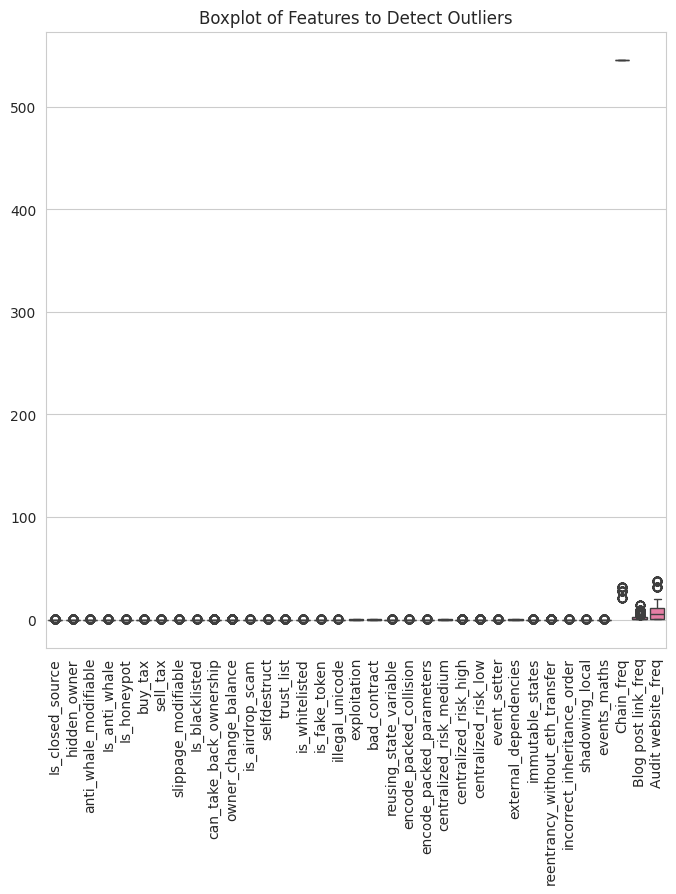

In [ ]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=df)
plt.title('Boxplot of Features to Detect Outliers')
plt.xticks(rotation=90)
plt.show()


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

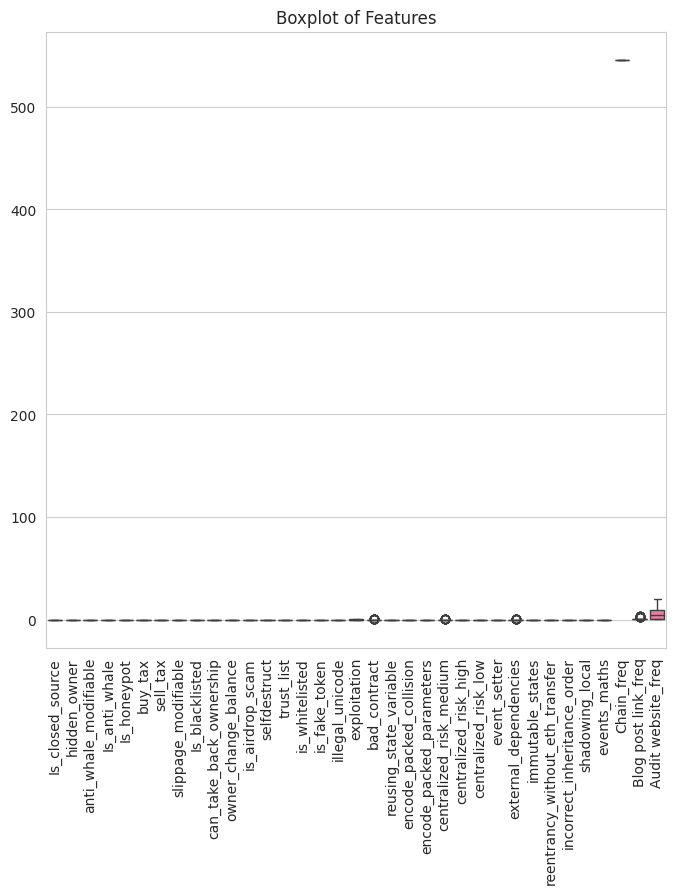

In [ ]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=df)
plt.title('Boxplot of Features')
plt.xticks(rotation=90)
plt.show()

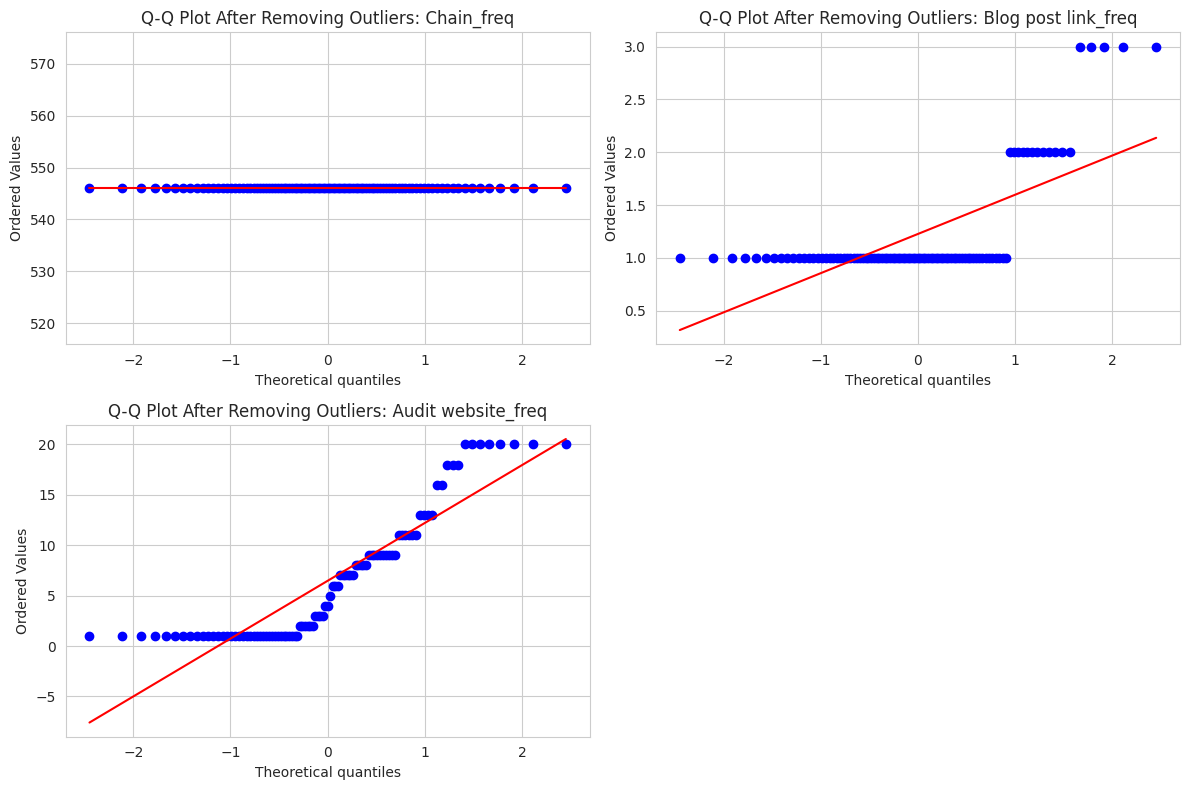

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

columns_to_check = ['Chain_freq', 'Blog post link_freq', 'Audit website_freq']

plt.figure(figsize=(12, 8))

for i, col in enumerate(columns_to_check):
    plt.subplot(2, 2, i + 1)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot After Removing Outliers: {col}')

plt.tight_layout()
plt.show()

In [ ]:
df = pd.DataFrame(df)
features = df.columns
features

Index(['Is_closed_source', 'hidden_owner', 'anti_whale_modifiable',
       'Is_anti_whale', 'Is_honeypot', 'buy_tax', 'sell_tax',
       'slippage_modifiable', 'Is_blacklisted', 'can_take_back_ownership',
       'owner_change_balance', 'is_airdrop_scam', 'selfdestruct', 'trust_list',
       'is_whitelisted', 'is_fake_token', 'illegal_unicode', 'exploitation',
       'bad_contract', 'reusing_state_variable', 'encode_packed_collision',
       'encode_packed_parameters', 'centralized_risk_medium',
       'centralized_risk_high', 'centralized_risk_low', 'event_setter',
       'external_dependencies', 'immutable_states',
       'reentrancy_without_eth_transfer', 'incorrect_inheritance_order',
       'shadowing_local', 'events_maths', 'Chain_freq', 'Blog post link_freq',
       'Audit website_freq'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df = scaler.fit_transform(df)
df

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.42980557, -0.23849902],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.42980557,  0.24683814],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.42980557,  0.08505909],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.46524625, -0.88561522],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
        -0.42980557,  1.0557334 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         1.46524625,  0.7321753 ]])

In [ ]:
df = pd.DataFrame(df, columns= features)
df

,Is_closed_source,hidden_owner,anti_whale_modifiable,Is_anti_whale,Is_honeypot,buy_tax,sell_tax,slippage_modifiable,Is_blacklisted,can_take_back_ownership,...,event_setter,external_dependencies,immutable_states,reentrancy_without_eth_transfer,incorrect_inheritance_order,shadowing_local,events_maths,Chain_freq,Blog post link_freq,Audit website_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.4107,0.0,0.0,0.0,0.0,0.0,0.0,-0.429806,-0.238499
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.4107,0.0,0.0,0.0,0.0,0.0,0.0,-0.429806,0.246838
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.4107,0.0,0.0,0.0,0.0,0.0,0.0,-0.429806,0.085059
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.4107,0.0,0.0,0.0,0.0,0.0,0.0,-0.429806,-0.885615
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.4107,0.0,0.0,0.0,0.0,0.0,0.0,-0.429806,-0.885615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.4107,0.0,0.0,0.0,0.0,0.0,0.0,-0.429806,-0.723836
93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.4107,0.0,0.0,0.0,0.0,0.0,0.0,3.360298,-0.885615
94,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.4107,0.0,0.0,0.0,0.0,0.0,0.0,1.465246,-0.885615
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-0.4107,0.0,0.0,0.0,0.0,0.0,0.0,-0.429806,1.055733


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca_data = pca.fit_transform(df)


explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

explained_variance, cumulative_variance

(array([0.25761531, 0.22422014, 0.16629736, 0.15608749, 0.11880786,
        0.07697184]),
 array([0.25761531, 0.48183545, 0.64813281, 0.8042203 , 0.92302816,
        1.        ]))

<ipython-input-31-b70a3aef9ef7>:10: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(K, distortions, 'bo-', color='blue')


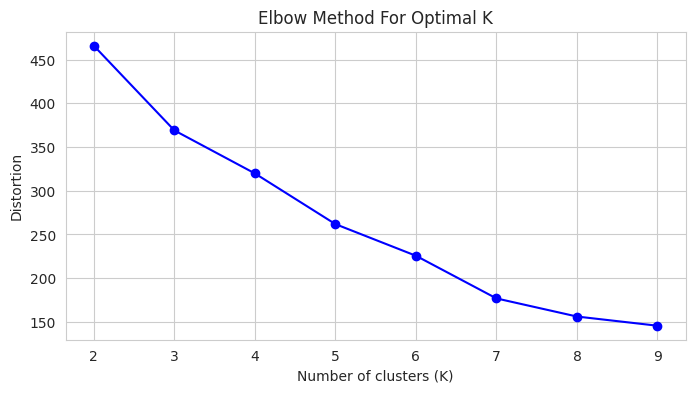

In [ ]:
from sklearn.cluster import KMeans
distortions = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K, distortions, 'bo-', color='blue')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal K')
plt.show()

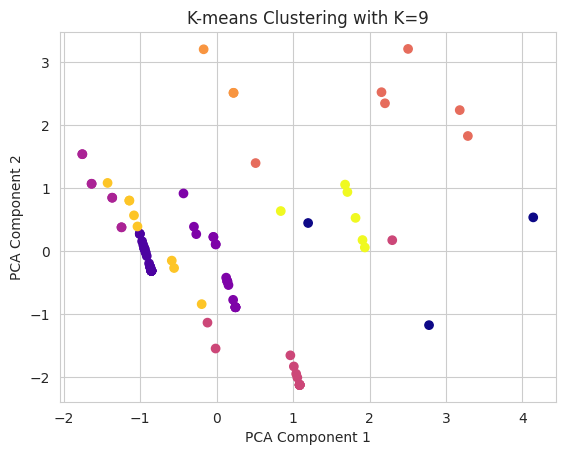

In [ ]:
kmeans = KMeans(n_clusters=9, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_data)

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=kmeans_labels, cmap='plasma')
plt.title('K-means Clustering with K=9')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg_k9 = silhouette_score(pca_data, kmeans_labels)

silhouette_avg_k9

0.4749487067086234

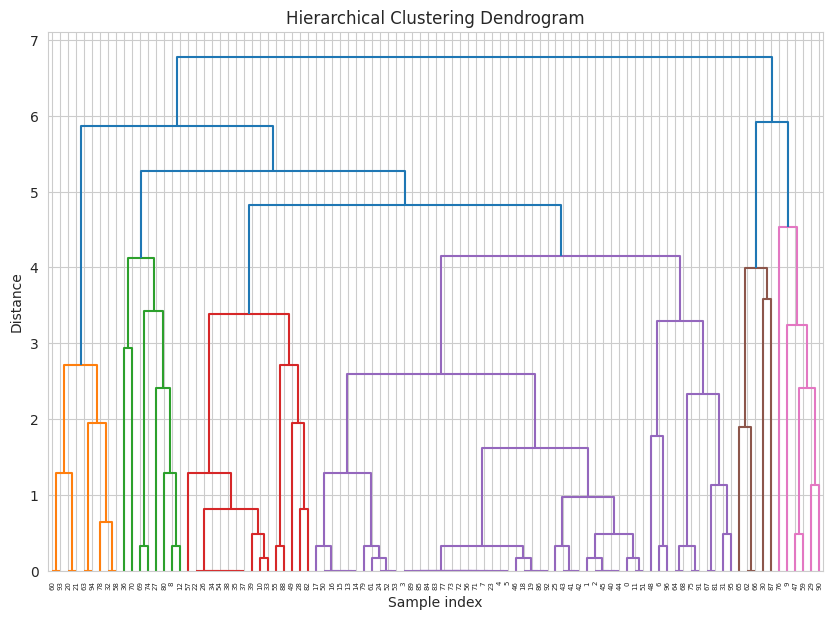

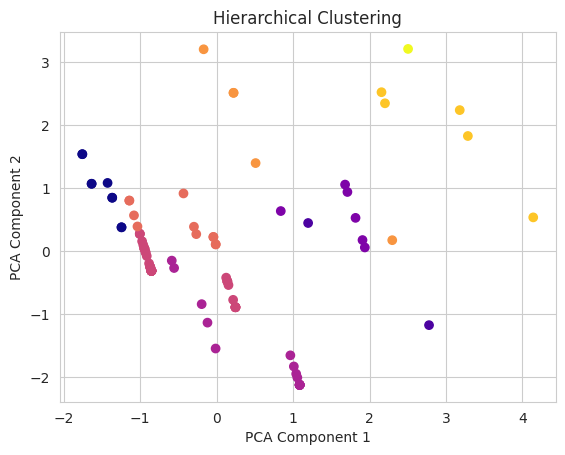

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform
hamming_dist = pdist(pca_data, metric='hamming')
Z = linkage(pca_data, method='complete')

plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


hierarchical_labels = fcluster(Z, t=9, criterion='maxclust')


plt.scatter(pca_data[:, 0], pca_data[:, 1], c=hierarchical_labels, cmap='plasma')
plt.title('Hierarchical Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [ ]:
hamming_dist

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
silhouette_avg_hierarchical = silhouette_score(pca_data, hierarchical_labels)
silhouette_avg_hierarchical

0.43679870699832946

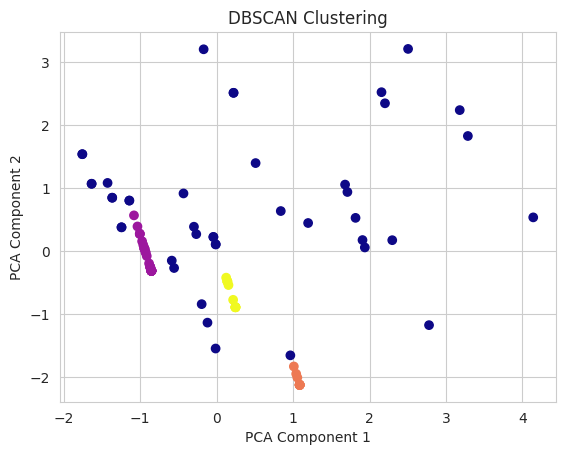

In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=5)
dbscan_labels = dbscan.fit_predict(pca_data)

plt.scatter(pca_data[:, 0], pca_data[:, 1], c=dbscan_labels, cmap='plasma')
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [ ]:
silhouette_avg_dbscan = silhouette_score(pca_data, dbscan_labels)

silhouette_avg_dbscan

0.2961452400492678

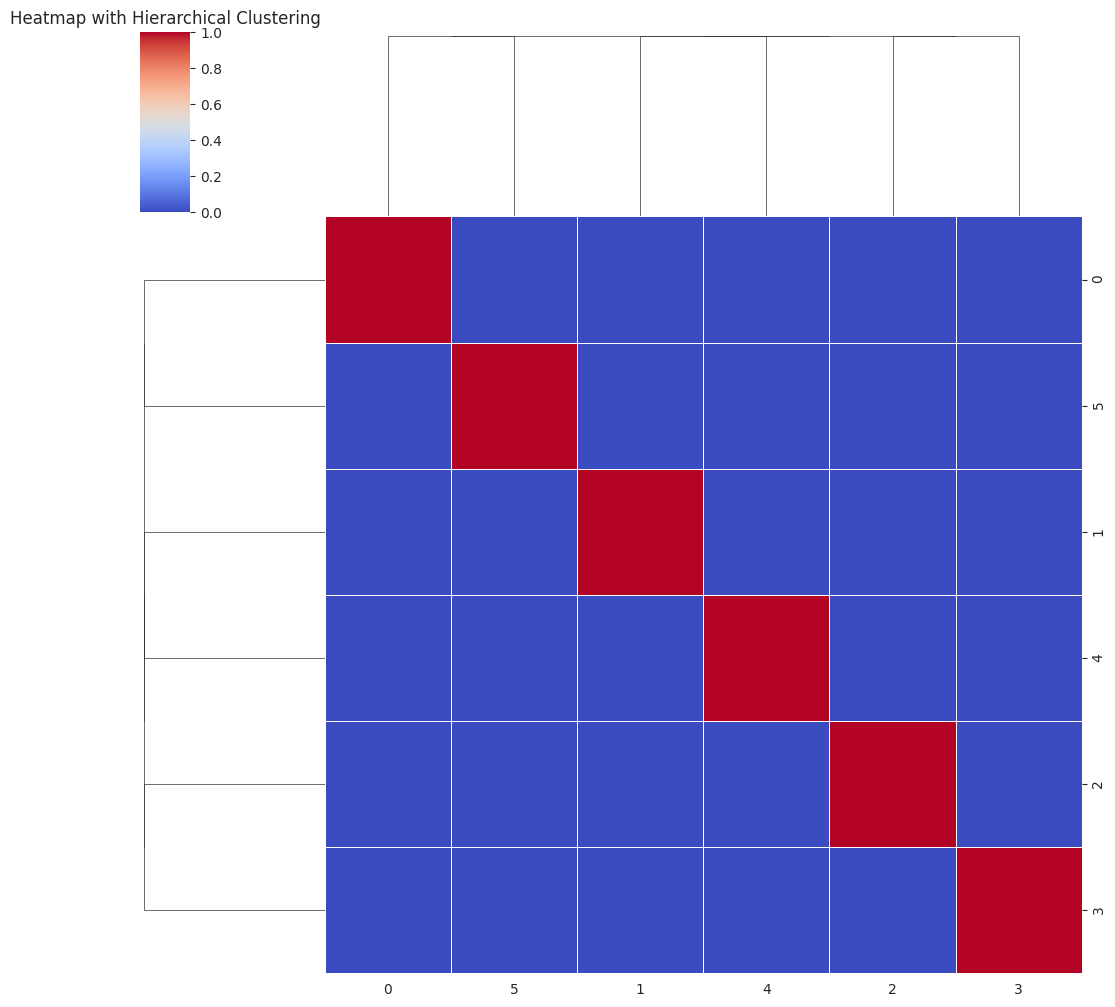

In [ ]:
corr_matrix = pd.DataFrame(pca_data).corr()
Z = linkage(pca_data, method='complete')
sns.clustermap(corr_matrix, cmap='coolwarm', linewidths=0.5, method='complete')
plt.title('Heatmap with Hierarchical Clustering')
plt.show()

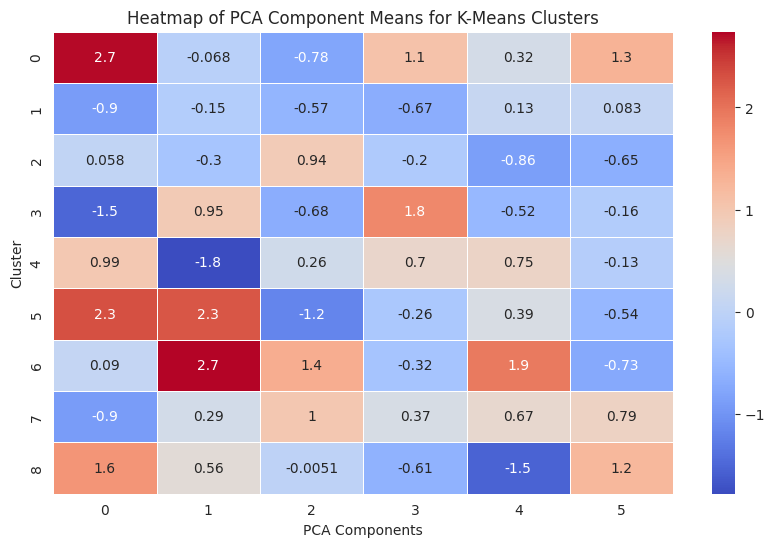

In [ ]:
pca_df = pd.DataFrame(pca_data)
pca_df['cluster'] = kmeans_labels


cluster_means = pca_df.groupby('cluster').mean()

plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of PCA Component Means for K-Means Clusters')
plt.xlabel('PCA Components')
plt.ylabel('Cluster')
plt.show()

In [ ]:
pca_loadings = pd.DataFrame(pca.components_.T,
                            columns=[f'PC{i+1}' for i in range(pca.n_components_)],
                            index=df.columns)
pca_loadings

,PC1,PC2,PC3,PC4,PC5,PC6
Is_closed_source,-6.735865e-18,-6.917300e-19,-4.705009e-18,-8.134883e-18,2.343665e-18,3.348302e-18
hidden_owner,1.110223e-16,-8.326673e-17,5.551115e-17,-0.000000e+00,-9.714451e-17,6.938894e-17
anti_whale_modifiable,-0.000000e+00,-8.326673e-17,0.000000e+00,2.220446e-16,-1.110223e-16,-5.551115e-17
Is_anti_whale,-2.775558e-17,4.163336e-17,5.551115e-17,-5.551115e-17,0.000000e+00,-1.110223e-16
Is_honeypot,-6.938894e-18,-0.000000e+00,-5.551115e-17,-0.000000e+00,0.000000e+00,0.000000e+00
buy_tax,3.469447e-18,-2.220446e-16,-1.387779e-17,5.551115e-17,1.110223e-16,-5.551115e-17
sell_tax,-0.000000e+00,-0.000000e+00,1.110223e-16,-5.551115e-17,-1.110223e-16,1.387779e-17
slippage_modifiable,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00
Is_blacklisted,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00
can_take_back_ownership,-0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00


<ipython-input-42-e44ee63a91f7>:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(risk_tags, rotation=45, ha='right')


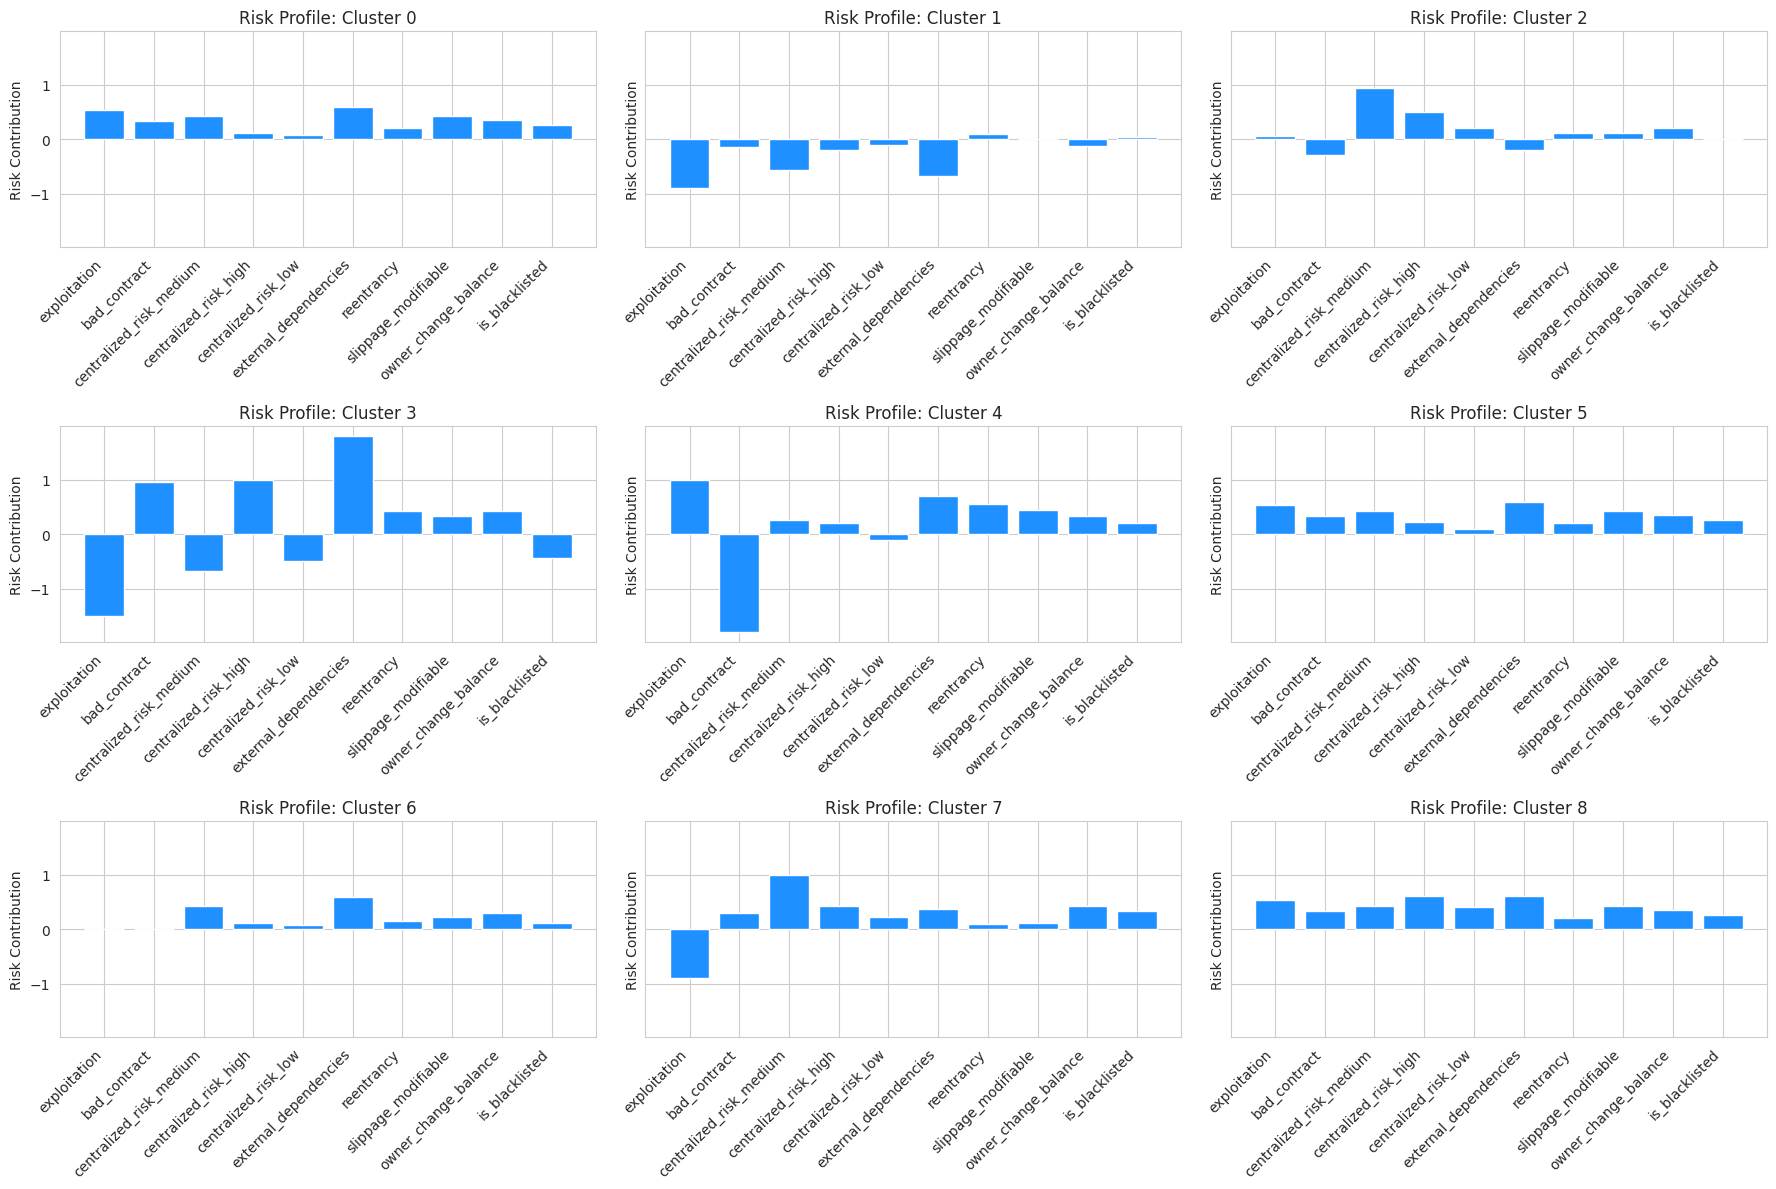

In [ ]:
risk_tags = [
    'exploitation', 'bad_contract', 'centralized_risk_medium', 'centralized_risk_high', 'centralized_risk_low',
    'external_dependencies', 'reentrancy', 'slippage_modifiable', 'owner_change_balance', 'is_blacklisted'
]

cluster_risk_contributions = {
    'Cluster 0': [0.54, 0.34, 0.43, 0.12, 0.08, 0.59, 0.21, 0.43, 0.35, 0.25],
    'Cluster 1': [-0.9, -0.15, -0.57, -0.2, -0.1, -0.67, 0.10, 0.00, -0.12, 0.03],
    'Cluster 2': [0.06, -0.3, 0.94, 0.50, 0.20, -0.2, 0.11, 0.12, 0.20, 0.01],
    'Cluster 3': [-1.5, 0.95, -0.68, 1.0, -0.5, 1.8, 0.43, 0.33, 0.42, -0.43],
    'Cluster 4': [0.99, -1.8, 0.26, 0.2, -0.1, 0.7, 0.56, 0.45, 0.34, 0.21],
    'Cluster 5': [0.54, 0.34, 0.43, 0.22, 0.10, 0.59, 0.21, 0.43, 0.35, 0.25],
    'Cluster 6': [0.00, 0.00, 0.43, 0.11, 0.08, 0.59, 0.14, 0.22, 0.30, 0.12],
    'Cluster 7': [-0.9, 0.29, 1.0, 0.43, 0.22, 0.37, 0.10, 0.11, 0.42, 0.33],
    'Cluster 8': [0.54, 0.34, 0.43, 0.61, 0.40, 0.61, 0.21, 0.43, 0.35, 0.25]
}
clusters = list(cluster_risk_contributions.keys())
n_clusters = len(clusters)


fig, axes = plt.subplots(3, 3, figsize=(18, 12), sharey=True)

axes = axes.flatten()

for i, cluster in enumerate(clusters):
    axes[i].bar(risk_tags, cluster_risk_contributions[cluster], color='dodgerblue')
    axes[i].set_title(f'Risk Profile: {cluster}')
    axes[i].set_xticklabels(risk_tags, rotation=45, ha='right')
    axes[i].set_ylabel('Risk Contribution')


plt.tight_layout()
plt.show()